In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score 

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")
%matplotlib inline 

In [2]:
income_df_master = pd.read_csv("income.csv", na_values=[" ?"])
income_df_master

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [3]:
income_df = income_df_master.copy()
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [4]:
income_df = income_df.fillna(income_df.mode().iloc[0])
income_df.SalStat = income_df.SalStat.apply(lambda x: 0 if x == ' less than or equal to 50,000' else 1)

In [5]:
income_df.describe()

,age,capitalgain,capitalloss,hoursperweek,SalStat
count,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850,0.240634
std,13.662085,7298.596271,401.594301,12.345285,0.427475
min,17.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,99999.000000,4356.000000,99.000000,1.000000


In [6]:
X = income_df.drop(["relationship", "capitalgain", "capitalloss", "capitalloss", "SalStat"], axis=1)
Y = income_df["SalStat"]
X.head()

,age,JobType,EdType,maritalstatus,occupation,race,gender,hoursperweek,nativecountry
0,45,Private,HS-grad,Divorced,Adm-clerical,White,Female,28,United-States
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,White,Male,40,United-States
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,White,Male,40,United-States
3,27,Private,9th,Never-married,Craft-repair,White,Male,40,Mexico
4,20,Private,Some-college,Never-married,Sales,White,Male,35,United-States


In [7]:
labels = ['JobType', 'EdType', 'maritalstatus', 'occupation', 'race', 'gender', 'nativecountry'] 
features = [X["age"].to_numpy().reshape(-1,1), X["hoursperweek"].to_numpy().reshape(-1,1)]

for l in labels: 
    le = LabelEncoder() 
    jt = le.fit_transform(X[l]) 
    ohe = OneHotEncoder() 
    features.append(ohe.fit_transform(jt.reshape(-1,1)).toarray()) 
    
X_arr = np.hstack(features) 
sc = StandardScaler() 
X_arr = sc.fit_transform(X_arr) 
print(X_arr.shape) 

(31978, 97)


In [8]:
train_X, test_X, train_y, test_y = train_test_split(X_arr, Y, train_size = 0.3, random_state=42, stratify=Y) 
print("Train:", train_X.shape, train_y.shape) 

Train: (9593, 97) (9593,)


In [9]:
results = pd.DataFrame(columns=["algorithm","accuracy","precision","recall","f1"])

# Q1 - Logistic Regression

In [10]:
algorithm = "Logistic Repression" 

logR = LogisticRegression()
logR.fit(train_X, train_y)
preds = logR.predict(test_X)

acc = accuracy_score(test_y, preds)
prec = precision_score(test_y, preds)
f1 = f1_score(test_y, preds)
rec = recall_score(test_y, preds)

results = results.append({ 
    "algorithm": algorithm, 
    "accuracy": acc, 
    "precision": prec, 
    "recall": rec,
    "f1": f1 
}, ignore_index=True) 

In [11]:
print(f"Accuracy: [{acc}], precision: [{prec}], f1-score: [{f1}]") 
print(confusion_matrix(test_y, preds)) 

Accuracy: [0.8327004690641054], precision: [0.6896950092421442], f1-score: [0.6145136387030364]
[[15655  1343]
 [ 2402  2985]]


# Q2 - k-NN

In [12]:
algorithm = "k-NN" 
knn = KNeighborsClassifier()
knn.fit(train_X, train_y) 
preds = knn.predict(test_X) 

acc = accuracy_score(test_y, preds) 
prec = precision_score(test_y, preds) 
f1 = f1_score(test_y, preds) 
rec = recall_score(test_y, preds) 

results = results.append({ 
    "algorithm": algorithm, 
    "accuracy": acc, 
    "precision": prec, 
    "recall": rec,
    "f1": f1 
}, ignore_index=True) 

In [13]:
print(f"Accuracy: [{acc}], precision: [{prec}], f1-score: [{f1}]") 
print(confusion_matrix(test_y, preds)) 

Accuracy: [0.8104534286352468], precision: [0.6185246581019478], f1-score: [0.5845491040830314]
[[15157  1841]
 [ 2402  2985]]


# Q3 - Decision Tree

In [14]:
algorithm = "Decision Tree" 

dt = DecisionTreeClassifier() 
dt.fit(train_X, train_y) 
preds = dt.predict(test_X) 

acc = accuracy_score(test_y, preds)
prec = precision_score(test_y, preds)
f1 = f1_score(test_y, preds) 
rec = recall_score(test_y, preds)

results = results.append({ 
    "algorithm": algorithm, 
    "accuracy": acc, 
    "precision": prec, 
    "recall": rec,
    "f1": f1 
}, ignore_index=True) 

In [15]:
print(f"Accuracy: [{acc}], precision: [{prec}], f1-score: [{f1}]") 
print(confusion_matrix(test_y, preds)) 

Accuracy: [0.7799865981684163], precision: [0.5430648769574944], f1-score: [0.541903078783369]
[[14547  2451]
 [ 2474  2913]]


# Q4 - Random Forest

In [16]:
algorithm = "Random Forest" 

rf = RandomForestClassifier()
rf.fit(train_X, train_y)
preds = rf.predict(test_X) 

acc = accuracy_score(test_y, preds) 
prec = precision_score(test_y, preds) 
f1 = f1_score(test_y, preds) 
rec = recall_score(test_y, preds) 

results = results.append({ 
    "algorithm": algorithm, 
    "accuracy": acc, 
    "precision": prec, 
    "recall": rec,
    "f1": f1 
}, ignore_index=True) 

In [17]:
print(f"Accuracy: [{acc}], precision: [{prec}], f1-score: [{f1}]") 
print(confusion_matrix(test_y, preds)) 

Accuracy: [0.8178691087781997], precision: [0.6396588486140725], f1-score: [0.5954153021732659]
[[15308  1690]
 [ 2387  3000]]


# Q5 - Naive Bayes

In [18]:
algorithm = "Naive Bayes" 

gnb = GaussianNB() 
gnb.fit(train_X, train_y) 
preds = gnb.predict(test_X)

acc = accuracy_score(test_y, preds) 
prec = precision_score(test_y, preds) 
f1 = f1_score(test_y, preds) 
rec = recall_score(test_y, preds) 

results = results.append({ 
    "algorithm": algorithm, 
    "accuracy": acc, 
    "precision": prec, 
    "recall": rec,
    "f1": f1 
}, ignore_index=True) 

In [19]:
print(f"Accuracy: [{acc}], precision: [{prec}], f1-score: [{f1}]") 
print(confusion_matrix(test_y, preds)) 

Accuracy: [0.3449184721911995], precision: [0.26505596920427493], f1-score: [0.4164743334659769]
[[ 2488 14510]
 [  154  5233]]


# Comparison

In [20]:
results

,algorithm,accuracy,precision,recall,f1
0,Logistic Repression,0.8327,0.689695,0.554112,0.614514
1,k-NN,0.810453,0.618525,0.554112,0.584549
2,Decision Tree,0.779987,0.543065,0.540746,0.541903
3,Random Forest,0.817869,0.639659,0.556896,0.595415
4,Naive Bayes,0.344918,0.265056,0.971413,0.416474


<AxesSubplot:xlabel='algorithm', ylabel='accuracy'>

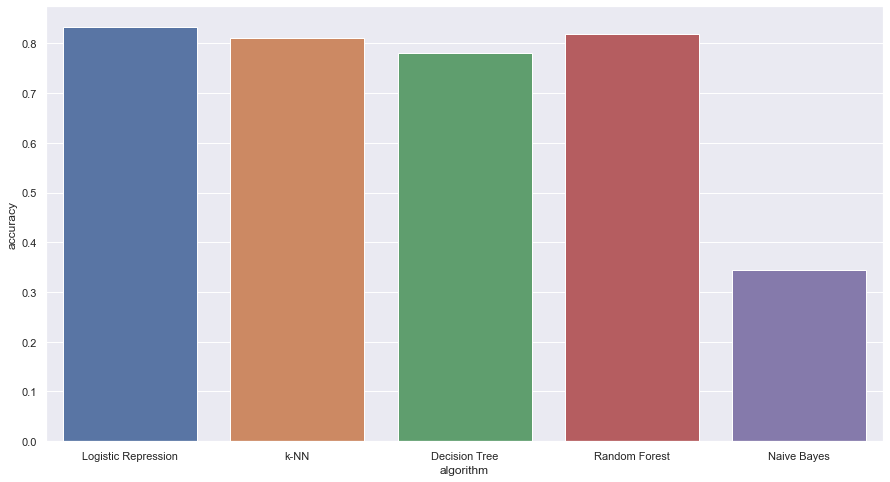

In [21]:
plt.figure(figsize = (15,8))
sns.barplot(x=results.algorithm, y=results.accuracy)

<AxesSubplot:xlabel='algorithm', ylabel='precision'>

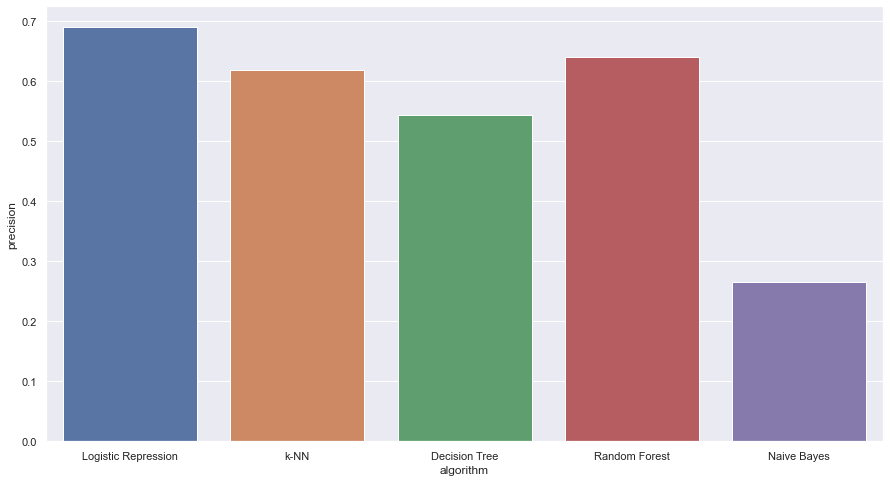

In [22]:
plt.figure(figsize = (15,8))
sns.barplot(x=results.algorithm, y=results.precision)

<AxesSubplot:xlabel='algorithm', ylabel='recall'>

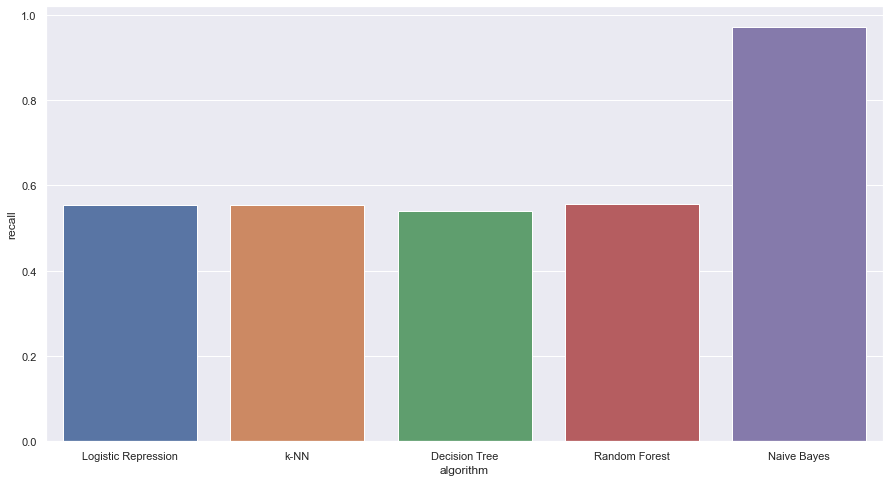

In [23]:
plt.figure(figsize = (15,8))
sns.barplot(x=results.algorithm, y=results.recall)

<AxesSubplot:xlabel='algorithm', ylabel='precision'>

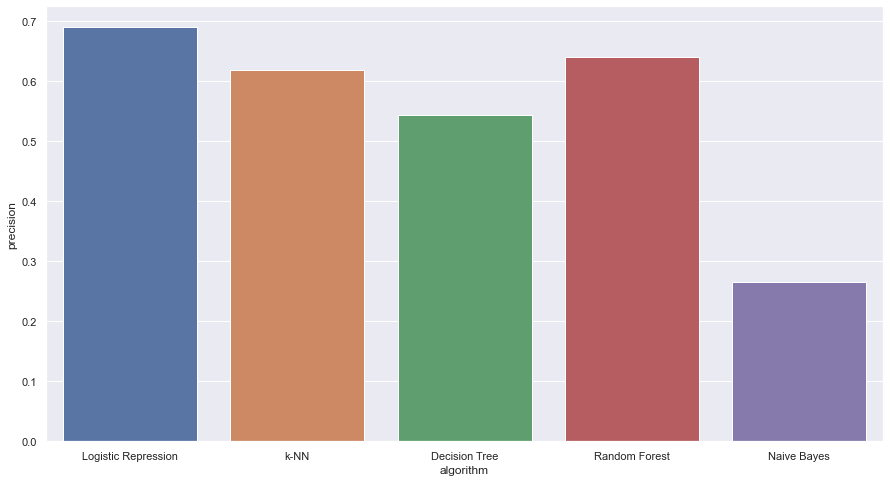

In [24]:
plt.figure(figsize = (15,8))
sns.barplot(x=results.algorithm, y=results.precision)